<a href="https://colab.research.google.com/github/TanOnRush/DSRP/blob/main/Tanjim_Chowdhury_TCS_DSRP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **🌠 Meteorite Landings - NASA Dataset**

This notebook explores a comprehensive dataset from **The Meteoritical Society**, detailing all known meteorite landings across the globe. The data was originally curated in a Fusion Table by **Javier de la Torre** and is also available as an XLS file.

The dataset includes **34,513 meteorite entries**, with the following key attributes:

- `place`: Location name of the meteorite landing
- `type_of_meteorite`: Classification of the meteorite
- `mass_g`: Mass of the meteorite in grams
- `fell_found`: Whether it was observed falling or later found
- `year`: Year of the landing or discovery
- `database`: Source database identifier
- `coordinate_1` / `coordinates_2`: Original coordinate values
- `cartodb_id`: CartoDB record ID
- `created_at` / `updated_at`: Timestamps for record creation and modification
- `year_date`: Full date reference
- `longitude` / `latitude`: Geographic coordinates
- `geojson`: GeoJSON representation for mapping purposes

[Dataset](https://data.nasa.gov/dataset/meteorite-landings) |
[Project Guide](https://docs.google.com/document/d/1s9s_jMi1Dyn21nLuOzUVnksSAA7MIJD8lD3z7uhz_uc/edit?tab=t.0)

In [16]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm

# Importing files
url = "https://data.nasa.gov/docs/legacy/meteorite_landings/Meteorite_Landings.csv"
nasa_df = pd.read_csv(url)
df = nasa_df

# Loading a custom fonts


KeyboardInterrupt: 

In [ ]:
# Basic information
nasa_df.info()

# Previewing the dataset
nasa_df

# Desribing the dataset
#nasa_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


### **🚨 Dataset Issues: NASA Meteorite Landings**

####**1. 📊 Schema & Missing Values**
- Dataset contains ~45,716 entries.
- Missing critical fields: `mass_g`, `year`, `reclat`, `reclong`, and `GeoLocation`.
- `year` stored inconsistently across formats (string vs. float).

#### **2. 🗓️ Date & Year Parsing Errors**
- Malformed entries such as `"01/01/1880 12:00:00 AM"` cause ambiguity.
- Parsing errors may result in outliers and inaccurate time-series analysis.

#### **3. 🌐 Geolocation Gaps**
- ~7,300 records (~16%) lack valid coordinates.
- Some entries contain zero or imprecise values, complicating geospatial visualization.

#### **4. 📉 Bias in Observations**
- Spatial bias: Meteorites concentrated in populated or research-heavy regions (e.g. Europe, Antarctica).
- Low detection in sparsely populated zones like oceans and deserts.

#### **5. ⚖️ Mass Outliers**
- Extreme mass values (e.g., Sikhote-Alin meteorite: ~23M grams) skew distribution.
- Outliers affect mean and standard deviation, distorting statistical summaries.

#### **6. 📑 Metadata & Licensing Gaps**
- Undefined license complicates reuse or redistribution.
- Metadata inconsistencies include missing source timestamps and database identifiers.

In [13]:
# Count the number of meteorites in each classification
class_counts = nasa_df['recclass'].value_counts().head(20)

# Show the top 10 most common classes
class_counts.head(100)


,count
recclass,
L6,8285
H5,7142
L5,4796
H6,4528
H4,4211
LL5,2766
LL6,2043
L4,1253
H4/5,428


/tmp/ipython-input-14-1965963295.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.values, y=class_counts.index, palette="coolwarm")


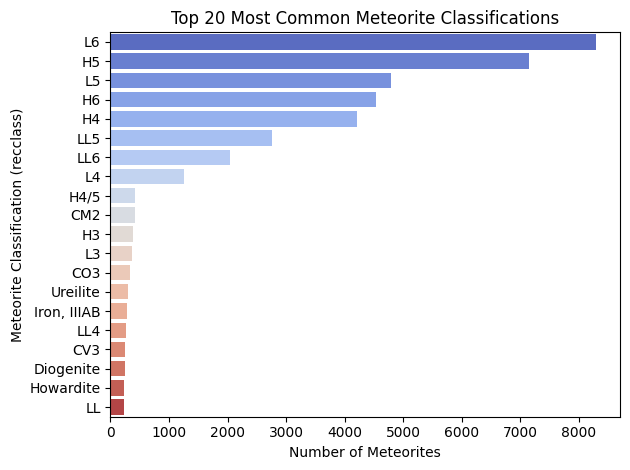

In [14]:
# Finding out most common classifications
sns.barplot(x=class_counts.values, y=class_counts.index, palette="coolwarm")
plt.title("Top 20 Most Common Meteorite Classifications")
plt.xlabel("Number of Meteorites")
plt.ylabel("Meteorite Classification (recclass)")
plt.tight_layout()
plt.show()